# Task 1: Investigate and analyze price data

After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file.

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

Download the monthly natural gas price data.
Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
Your code should take a date as input and return a price estimate.
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for.



## Provided Solution

#### **Data Exploration:**
- Evaluated monthly data of natural gas prices.
- Presented findings via visual plots.

#### **Simple Regression Model**
- Established a basic regression model for predicting historical natural gas prices and projected trends for an upcoming year.
- Identified limitation: The forecast lacked seasonal fluctuations, resulting in a linear prediction.

#### **ARIMA Model**
- Implemented an ARIMA model for a more nuanced price prediction.
- The resulting forecast highlighted the anticipated seasonal variations in prices.

#### **Real World Events**
- While mathematical models are pivotal, it's essential to integrate real-world events for a holistic analysis.
- Marked significant geopolitical and natural occurrences on the graph to correlate price shifts with world events.

## Simple Regression Model

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import calendar


In [57]:
# Import data from Nat_Gas.csv
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])

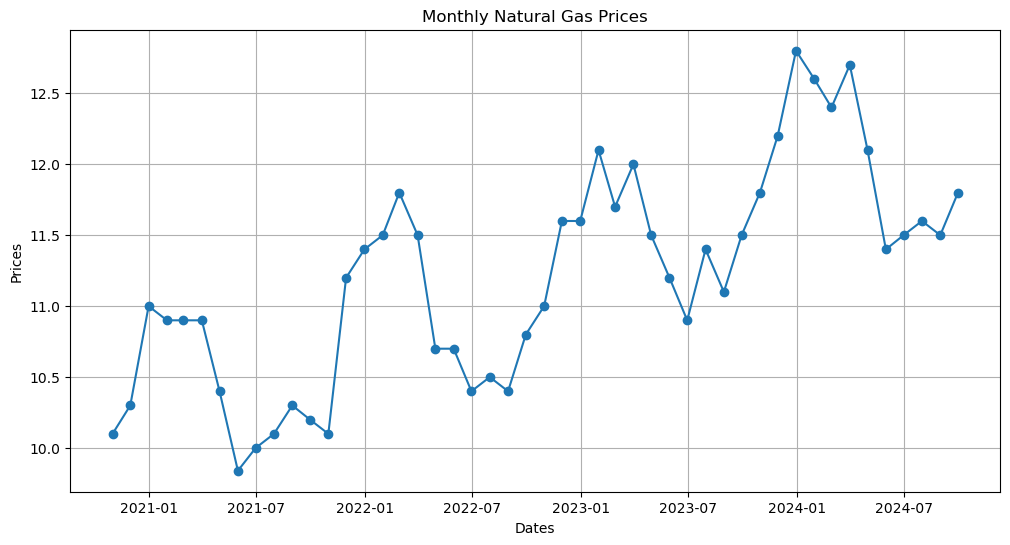

In [58]:
# Visualise the data
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], '-o', label="Actual prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title("Monthly Natural Gas Prices")
plt.grid(True)
plt.show()

/var/folders/0q/2n40vcp54rng15n83s0yz7340000gn/T/ipykernel_26429/56563820.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('Month').mean()


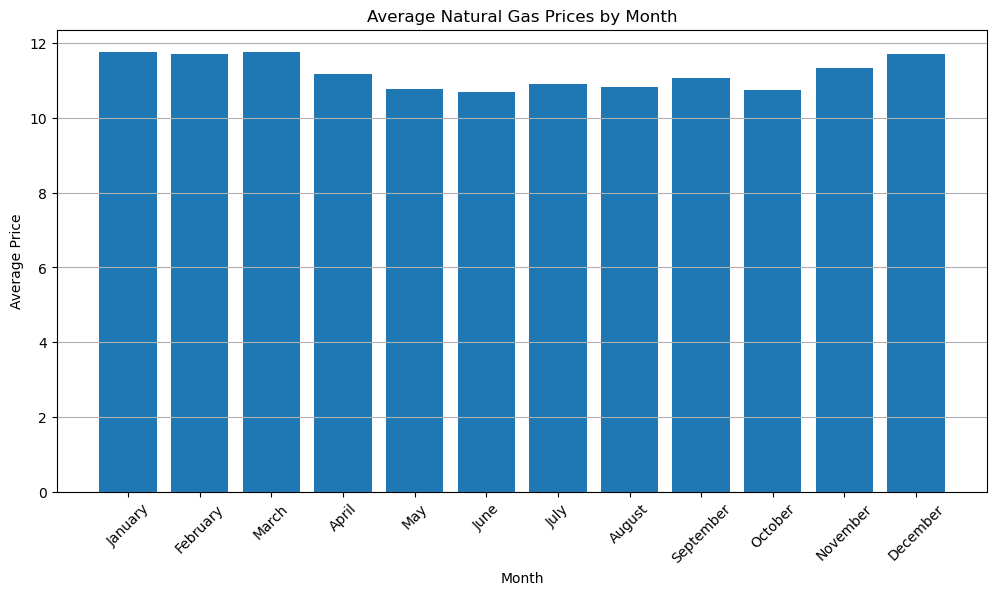

In [59]:
# Check for any patterns or seasonality
df['Month'] = df['Dates'].dt.month
grouped = df.groupby('Month').mean()
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped['Prices'])
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Natural Gas Prices by Month")
plt.grid(axis='y')
plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=45)
plt.show()

In [60]:
# Extrapolation using Linear Regression
# Convert dates to ordinal numbers
df['Date_ordinal'] = df['Dates'].apply(lambda x: x.toordinal())

df.head()

,Dates,Prices,Month,Date_ordinal
0,2020-10-31,10.1,10,737729
1,2020-11-30,10.3,11,737759
2,2020-12-31,11.0,12,737790
3,2021-01-31,10.9,1,737821
4,2021-02-28,10.9,2,737849


In [61]:
# Define model and fit to the data
model = LinearRegression()
model.fit(df[['Date_ordinal']], df['Prices'])

LinearRegression()

In [62]:
# Predict for an extra year (12 months)
next_dates = [(df['Dates'].iloc[-1] + timedelta(days=30*i)).toordinal() for i in range(1, 13)]
predicted_prices = model.predict(np.array(next_dates).reshape(-1, 1))

/Users/patrickmontgomery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


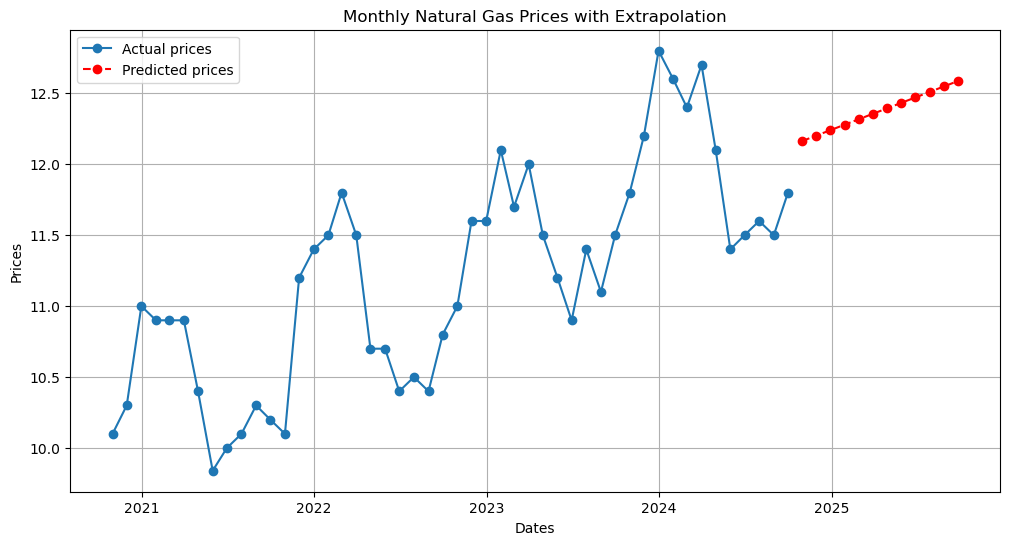

In [63]:
# Plotting existing and extrapolated data
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], '-o', label="Actual prices")
plt.plot(pd.to_datetime([datetime.fromordinal(date) for date in next_dates]), predicted_prices, 'r--o', label="Predicted prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title("Monthly Natural Gas Prices with Extrapolation")
plt.grid(True)
plt.legend()
plt.show()

# ARIMA (AutoRegressive Integrated Moving Average)

In [80]:
# Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [73]:
# Load data into a pandas dataframe
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])
df.set_index('Dates', inplace=True)

In [78]:
# Split data into train and test
train = df.iloc[:-12]
test = df.iloc[-12:]

In [82]:
# Use auto_arima to find the best ARIMA parameters
stepwise_fit = auto_arima(train, start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12,
                          seasonal=True,
                          trace=True, 
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

# Display the best ARIMA parameters
print(stepwise_fit.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=35.472, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=37.411, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=33.531, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=34.978, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=35.777, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=39.410, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=34.343, Time=0.26 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=35.024, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=34.899, Time=0.57 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=33.476, Time=0.03 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=35.472, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=33.882, Time=0.12 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=37.472, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=33.364,

In [83]:
# Fit ARIMA model using the best parameters
model = ARIMA(train, order=stepwise_fit.order, seasonal_order=stepwise_fit.seasonal_order)
fit_model = model.fit()

# Forecasting
forecast = fit_model.get_forecast(steps=12).predicted_mean
conf_int = fit_model.get_forecast(steps=12).conf_int()

/Users/patrickmontgomery/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/patrickmontgomery/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/patrickmontgomery/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


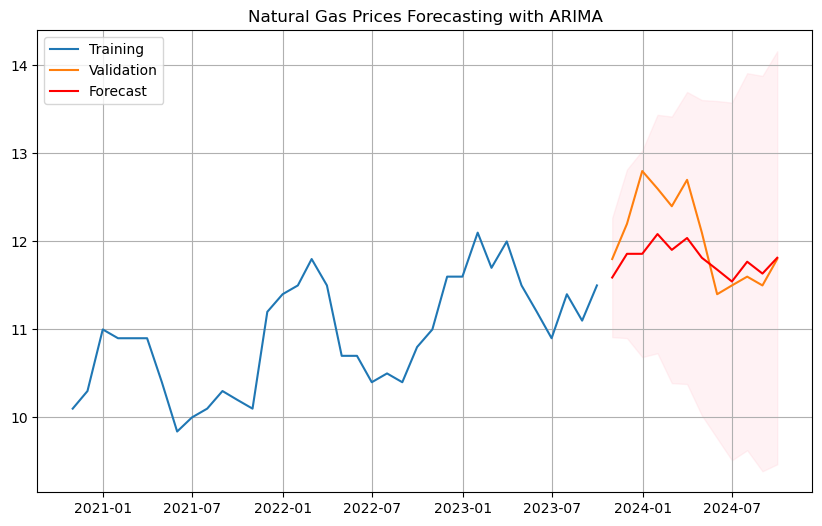

In [84]:
# Visualise the predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Training")
plt.plot(test.index, test, label="Validation")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc="upper left")
plt.title("Natural Gas Prices Forecasting with ARIMA")
plt.grid()
plt.show()

# Adding Events Affecting Natural Gas Prices

/var/folders/0q/2n40vcp54rng15n83s0yz7340000gn/T/ipykernel_26429/2406160162.py:17: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  annotation_y = train.loc[event_date] if event_date in train.index else train.iloc[train.index.get_loc(event_date, method='nearest')]


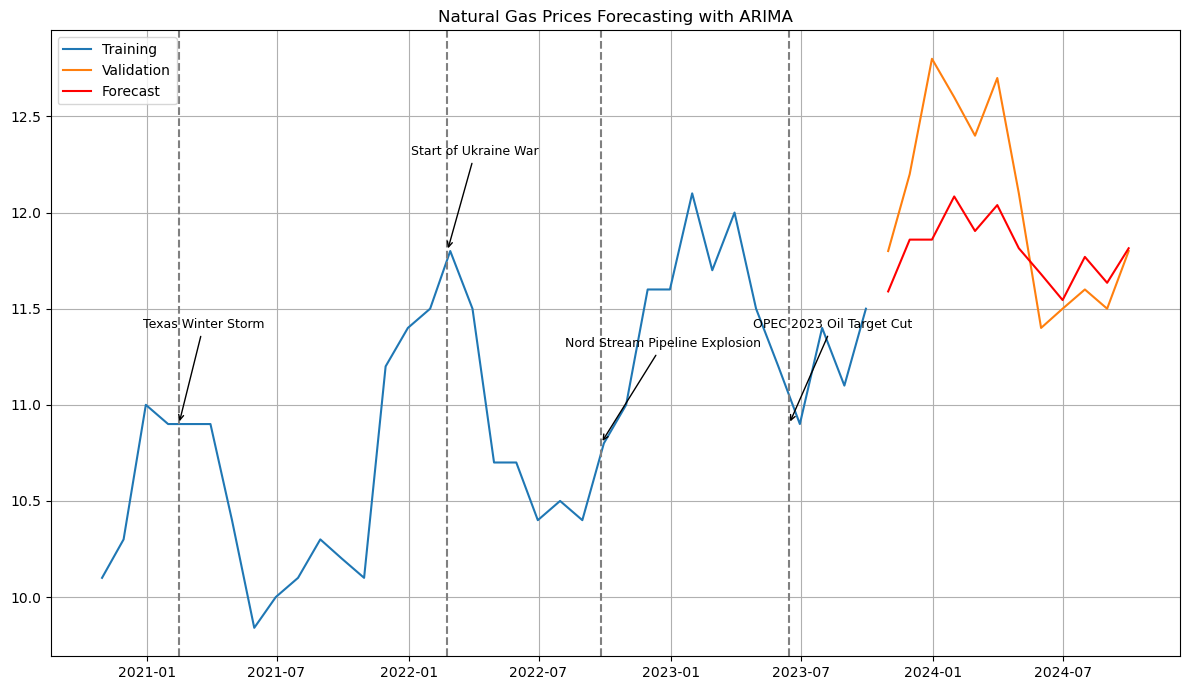

In [85]:
# Visualise the predictions
plt.figure(figsize=(12, 7))
plt.plot(train.index, train, label="Training")
plt.plot(test.index, test, label="Validation")
plt.plot(test.index, forecast, label="Forecast", color='red')

# Events 
events = {
    pd.Timestamp('2021-02-15'): 'Texas Winter Storm',
    pd.Timestamp('2022-02-24'): 'Start of Ukraine War',    
    pd.Timestamp('2022-09-26'): 'Nord Stream Pipeline Explosion',    
    pd.Timestamp('2023-06-15'): 'OPEC 2023 Oil Target Cut'    
}

for event_date, event_label in events.items():
    # Check if event_date exists in train, otherwise use a nearby date for annotation position
    annotation_y = train.loc[event_date] if event_date in train.index else train.iloc[train.index.get_loc(event_date, method='nearest')]
    
    plt.axvline(event_date, color='grey', linestyle='--')
    plt.annotate(event_label, 
                 xy=(event_date, annotation_y),
                 xytext=(event_date - pd.Timedelta(days=50), annotation_y + 0.5),
                 arrowprops=dict(facecolor='black', arrowstyle="->"),
                 fontsize=9)

plt.legend(loc="upper left")
plt.title("Natural Gas Prices Forecasting with ARIMA")
plt.grid()
plt.tight_layout()
plt.savefig('nat_gas_forecast.png')
plt.show()